# Exploratory Data Analysis and Regression Models 

#### This notebook will explore a used car sales data available in kaggle and use a few reggression model (linear, bagging, and booting) to fit and predict the data

In [419]:
# Import some library and modules. I will keep adding more as I go through the projects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [420]:
# I saved the data in the same directory I am working on. A better prractice would be to saved them in a seperate folder.
df=pd.read_csv("toyota.csv")

In [423]:
# check first few rows of the data just to get an understading of the dataset
df.head(6)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,260,36.2,2.0


In [424]:
# Check the datatype of eacch column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [425]:
# Let's see if there are any missing value
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

The data does not have any missing values which is great. Also it looks like there are some columns that can be used a categorical variables. Also, the year column can be converted to age of the cars to better understand its impact on car price. We will create a new column 'age' and drop column' year'.

In [429]:
# Convert the object datatype to category datatype
df['model']=df.model.astype('category')
df['transmission']=df.transmission.astype('category')
df['fuelType']=df.fuelType.astype('category')
#Create a new feature 'age' and drop the 'year' feature
df['age']=2021-df.year
df.drop(columns='year', inplace=True)

AttributeError: 'DataFrame' object has no attribute 'year'

In [432]:
# let's check the some simple statistical parameter such as mean, standard deviaiton, range of 
# both numerical and categorical columns.
df.describe(include='all')

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
count,6738,6738.000000,6738,6738.000000,6738,6738.000000,6738.000000,6738.000000,6738.000000
unique,18,NaN,4,NaN,4,NaN,NaN,NaN,NaN
top,Yaris,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,NaN
freq,2122,NaN,3826,NaN,4087,NaN,NaN,NaN,NaN
mean,NaN,12522.391066,NaN,22857.413921,NaN,94.697240,63.042223,1.471297,4.251855
std,NaN,6345.017587,NaN,19125.464147,NaN,73.880776,15.836710,0.436159,2.204062
min,NaN,850.000000,NaN,2.000000,NaN,0.000000,2.800000,0.000000,1.000000
25%,NaN,8290.000000,NaN,9446.000000,NaN,0.000000,55.400000,1.000000,3.000000
50%,NaN,10795.000000,NaN,18513.000000,NaN,135.000000,62.800000,1.500000,4.000000
75%,NaN,14995.000000,NaN,31063.750000,NaN,145.000000,69.000000,1.800000,5.000000


The above table shows some useful information. For example:
- There are 6748 rows or observations in the data
- There are 18 different car models, and Yaris is the highest number of frequency
- There are four difference transmission types. Interestingly, Manual transmission is the highest frequencey
- There are four different fuel type and Petrol is hte mosly used fuel type which is not surprising to me
- Average price of the car is about 12500 . That sounds quite high. Also, the lowest price of the car is only 850 and highest is about 60k. I dont think I will ever buy an used car for 60k. However, 75% percentile of the price is below 15k. So, the maximum price of the car shown in the data could be an outlier or an error.
- The average age of the cars is only 4.25 years, with 75 percentile age is ony 5 years which suggest that 75% of the cars are not aged more than 5 year. The oldest age in the data set is 23 years old, the youngest age is only 1 year old.

We can save this table as a dataframe so that we can use it later. 


In [437]:
# Save the summary in a dataframe
data_summary= pd.DataFrame(df.describe(include='all')).reset_index()
data_summary

,index,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,count,6738,6738.000000,6738,6738.000000,6738,6738.000000,6738.000000,6738.000000,6738.000000
1,unique,18,NaN,4,NaN,4,NaN,NaN,NaN,NaN
2,top,Yaris,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,NaN
3,freq,2122,NaN,3826,NaN,4087,NaN,NaN,NaN,NaN
4,mean,NaN,12522.391066,NaN,22857.413921,NaN,94.697240,63.042223,1.471297,4.251855
5,std,NaN,6345.017587,NaN,19125.464147,NaN,73.880776,15.836710,0.436159,2.204062
6,min,NaN,850.000000,NaN,2.000000,NaN,0.000000,2.800000,0.000000,1.000000
7,25%,NaN,8290.000000,NaN,9446.000000,NaN,0.000000,55.400000,1.000000,3.000000
8,50%,NaN,10795.000000,NaN,18513.000000,NaN,135.000000,62.800000,1.500000,4.000000
9,75%,NaN,14995.000000,NaN,31063.750000,NaN,145.000000,69.000000,1.800000,5.000000


We will now show some visualization to better understand the dataset.


In [55]:
# lets put all caterical data in a single plot so that 



In [458]:
df.groupby(by=['model', 'fuelType','transmission']).mean()

price       mileage         tax  \
model  fuelType transmission                                           
 Auris Diesel   Automatic              NaN           NaN         NaN   
                Manual         8460.833333  44729.214286   23.809524   
                Other                  NaN           NaN         NaN   
                Semi-Auto              NaN           NaN         NaN   
       Hybrid   Automatic     13821.915663  32493.769076   27.610442   
...                                    ...           ...         ...   
 Yaris Other    Semi-Auto              NaN           NaN         NaN   
       Petrol   Automatic     11229.144928  18265.545894  100.265700   
                Manual         9855.857252  20174.955725  104.824427   
                Other                  NaN           NaN         NaN   
                Semi-Auto      8242.562500  33786.500000   49.375000   

                                    mpg  engineSize       age  
model  fuelType transmission                                   
 Auris Diesel   Automatic           NaN         NaN       NaN  
                Manual        69.757143    1.523810  5.714286  
                Other               NaN         NaN       NaN  
                Semi-Auto           NaN         NaN       NaN  
       Hybrid   Automatic     73.966466    1.800000  5.210843  
...                                 ...         ...       ...  
 Yaris Other    Semi-Auto           NaN         NaN       NaN  
       Petrol   Automatic     55.187923    1.411111  4.468599  
                Manual        54.644809    1.392595  4.016031  
                Other               NaN         NaN       NaN  
                Semi-Auto     54.668750    1.312500  7.312500  

[288 rows x 6 columns]

 There are so many different way we can explore the dataset. Let's check aveage car price based on  categorical variable in the dataset.  This will not going to give us a lot of information on the price prediction as price will also depend on other factor such as age, and mileage. However, this will show how to create a pivot table. We can also use groupby function to present data.

In [460]:
#Create a pivot table that will show average car price of each model based on the transmission and fuelType used.
pivot_table=pd.pivot_table(df,values='price', index=['model','transmission'], columns='fuelType',aggfunc=np.mean, fill_value=0)
pivot_table

fuelType                           Diesel        Hybrid         Other  \
model          transmission                                             
 Auris         Automatic         0.000000  13821.915663  15495.000000   
               Manual         8460.833333      0.000000      0.000000   
               Semi-Auto         0.000000      0.000000      0.000000   
 Avensis       Automatic      4245.000000      0.000000      0.000000   
               Manual         9302.150685      0.000000      0.000000   
               Semi-Auto      7490.000000      0.000000      0.000000   
 Aygo          Automatic         0.000000      0.000000   9453.200000   
               Manual            0.000000      0.000000   7527.500000   
               Semi-Auto         0.000000      0.000000      0.000000   
 C-HR          Automatic         0.000000  21759.215909  26720.285714   
               Manual            0.000000      0.000000      0.000000   
 Camry         Automatic         0.000000  26910.090909      0.000000   
 Corolla       Automatic         0.000000  23146.038674  24245.000000   
               Manual         2495.000000      0.000000      0.000000   
 GT86          Automatic         0.000000      0.000000      0.000000   
               Manual            0.000000      0.000000      0.000000   
               Semi-Auto         0.000000      0.000000      0.000000   
 Hilux         Automatic     23296.523810      0.000000      0.000000   
               Manual        19794.113636      0.000000      0.000000   
 IQ            Automatic         0.000000      0.000000      0.000000   
               Manual            0.000000      0.000000      0.000000   
 Land Cruiser  Automatic     34319.000000      0.000000      0.000000   
               Manual        17328.333333      0.000000      0.000000   
               Semi-Auto     40302.259259      0.000000      0.000000   
 PROACE VERSO  Automatic     31291.888889      0.000000      0.000000   
               Manual        24762.666667      0.000000      0.000000   
 Prius         Automatic         0.000000  18866.200935  21359.705882   
               Manual            0.000000      0.000000   7250.000000   
 RAV4          Automatic     12228.956522  22947.121739  20848.800000   
               Manual        12530.923567      0.000000      0.000000   
               Semi-Auto         0.000000      0.000000      0.000000   
 Supra         Automatic         0.000000      0.000000  59995.000000   
               Semi-Auto         0.000000      0.000000      0.000000   
 Urban Cruiser Manual         4995.000000      0.000000      0.000000   
 Verso         Automatic         0.000000      0.000000  15750.000000   
               Manual        10522.862069      0.000000      0.000000   
               Semi-Auto         0.000000      0.000000      0.000000   
 Verso-S       Automatic         0.000000      0.000000      0.000000   
               Manual            0.000000      0.000000      0.000000   
 Yaris         Automatic         0.000000  12138.478261  11555.500000   
               Manual         6540.363636  13369.750000      0.000000   
               Other             0.000000  12795.000000      0.000000   
               Semi-Auto         0.000000      0.000000      0.000000   

fuelType                           Petrol  
model          transmission                
 Auris         Automatic     10626.500000  
               Manual         9467.680851  
               Semi-Auto      9492.000000  
 Avensis       Automatic     11654.375000  
               Manual        11184.727273  
               Semi-Auto      9130.000000  
 Aygo          Automatic      8491.464286  
               Manual         7710.274719  
               Semi-Auto      9263.095541  
 C-HR          Automatic     18365.428571  
               Manual        16506.023529  
 Camry         Automatic         0.000000  
 Corolla       Automatic      1547.000000  
               Manual        16644.419753  
 GT86     

The above table does not give entire picture of the dataset but it does give some useful information. For example:
- The average price of a automatic hybrid Yaris in the dataset is about 12k.

We can also see the frequencies of car by model, transmission, and fuel type as shown below.

In [475]:
df.groupby(['model','fuelType','transmission']).size().unstack()

transmission       Automatic  Manual  Other  Semi-Auto
model    fuelType                                     
 Auris   Diesel            0      42      0          0
         Hybrid          498       0      0          0
         Other             1       0      0          0
         Petrol           28     141      0          2
 Avensis Diesel            2      73      0          1
...                      ...     ...    ...        ...
 Verso-S Petrol            1       2      0          0
 Yaris   Diesel            0      22      0          0
         Hybrid          552       4      1          0
         Other            10       0      0          0
         Petrol          207    1310      0         16

[72 rows x 4 columns]

## Visualization
Let do some visualization to better undetands the data

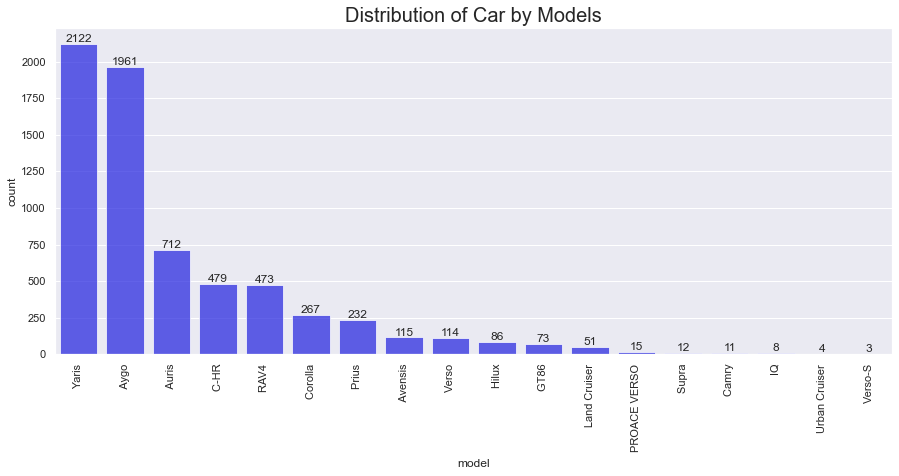

In [525]:
# Explore distribution of 
plt.figure(figsize=(15,6))
ax=sns.countplot(x='model',
                  data= df,
             order=df.model.value_counts().index,palette=['blue'],alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Distribution of Car by Models', fontsize=20)
for container in ax.containers:
    ax.bar_label(container)

Text(0.5, 1.0, 'Distribution by Fuel Type')

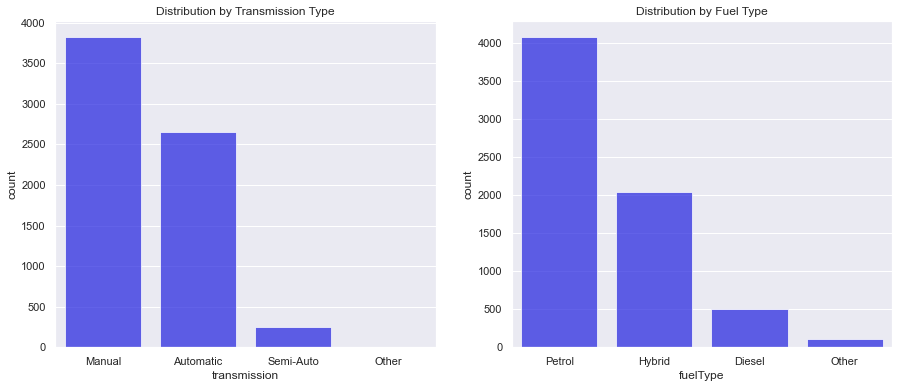

In [522]:
# Explore distribution of 
fig,ax=plt.subplots(1,2, figsize=(15,6),gridspec_kw={'width_ratios':[1,1]})
ax[0]=sns.countplot(x='transmission',data= df,order=df.transmission.value_counts().index,palette=['blue'],alpha=0.7, ax=ax[0])
ax[1]=sns.countplot(x='fuelType',data= df, order=df.fuelType.value_counts().index,palette=['blue'],alpha=0.7, ax=ax[1])
ax[0].set_title('Distribution by Transmission Type')
ax[1].set_title('Distribution by Fuel Type')


Lets do so boxplots to see the distribuion or understand outliers in the data. We have not scaled the data. So we need to perform sperate boxplot for each variables.I am only interested in understadning the distribution of price, age, and mileage.

Text(0.5, 0.98, 'Boxplots')

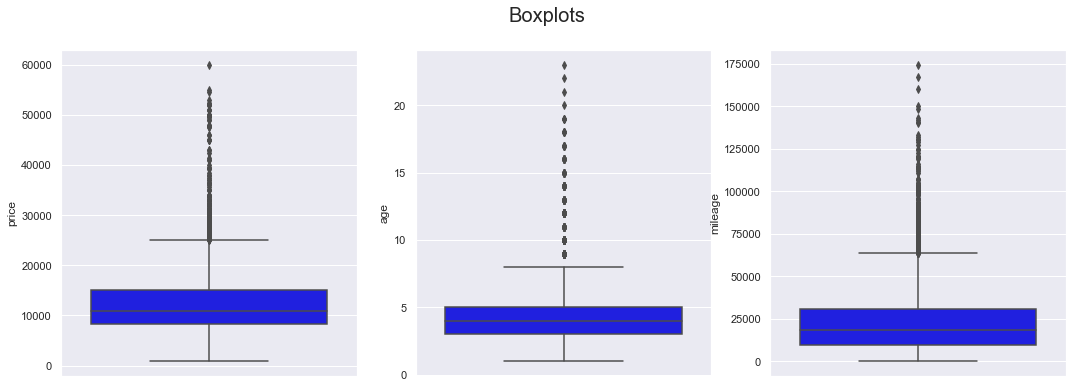

In [550]:
fig,ax=plt.subplots(1,3, figsize=(18,6))
ax[0]=sns.boxplot(y=df.price,data=df,palette=['blue'],ax=ax[0])
ax[1]=sns.boxplot(y=df.age,data=df,palette=['blue'], ax=ax[1])
ax[2]=sns.boxplot(y=df.mileage,data=df,palette=['blue'], ax=ax[2])
fig.suptitle('Boxplots',fontsize=20)

The above boxplots may seem somewhat redundant as they tell us what we already know about the percentiles but they show how skewed the the variables are. 

In the next section, let's draw a pairplot and correlation plots to see the correlation between the variables which will help us deciding if we need to discard any variable if there is any multicolliearity .

C:\Users\ashra\anaconda3\envs\ox\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ashra\anaconda3\envs\ox\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ashra\anaconda3\envs\ox\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ashra\anaconda3\envs\ox\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ashra\anaconda3\envs\ox\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ashra\anaconda3\envs\ox\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has

<Figure size 1296x1296 with 0 Axes>

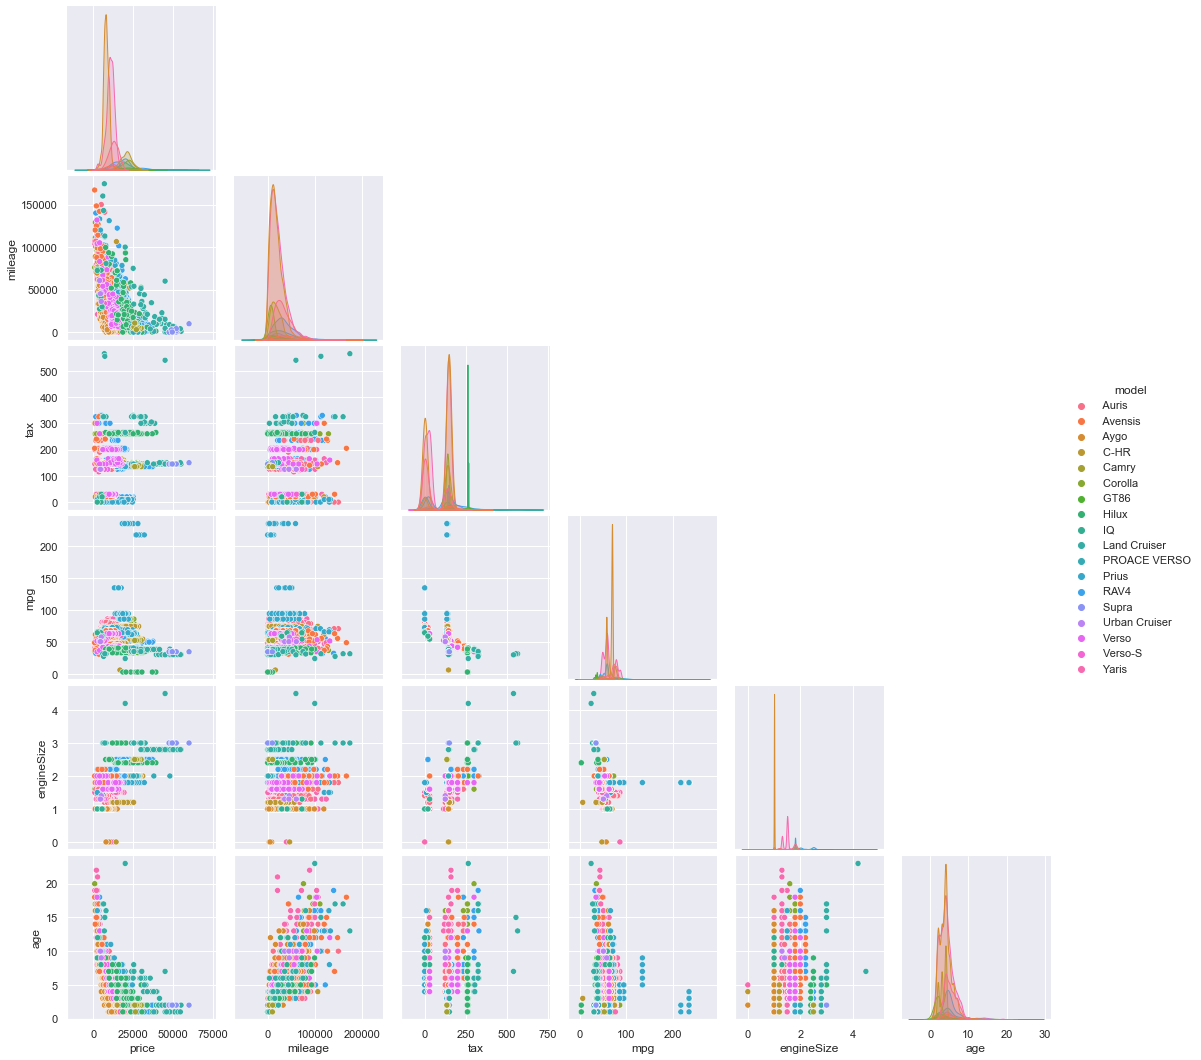

In [551]:
fig=plt.figure(figsize=(18,18))
ax=sns.pairplot(df,hue='model',corner=True) # we do not need the upper righ of the plot


<AxesSubplot:>

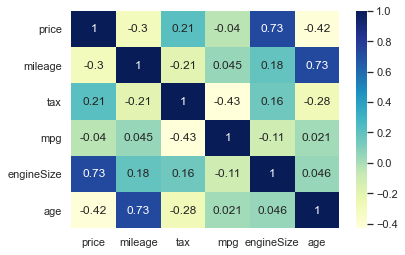

In [94]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

The pairplot and the correlation plot show that there are not any unusual collinearlity between variables (excluding price). They also give us some important information, for example:
- price and mileage are inversely correlation
- price and age are inversely corelated
- price and engine size are postively correlated

# Model Development and Comparison
We will start with a simple linear regression model and then develop two additional models and check how they compare with each other based on some metrics

### Data Preparation
We will convert categorial variables into 0-1 dummy variables to use categorical variables in our model. 

In [552]:
# thre are three categorical features (model, transmission, and fueltype) in the dataset. We will only use (n-1) featrues for each categoriy 
# where n is the number of categor
df_new=pd.get_dummies(df,drop_first=True) 


In [553]:
df_new.head()

,price,mileage,tax,mpg,engineSize,age,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,16000,24089,265,36.2,2.0,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,15995,18615,145,36.2,2.0,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,13998,27469,265,36.2,2.0,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,18998,14736,150,36.2,2.0,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,17498,36284,145,36.2,2.0,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


Our target variable or feature is 'price'. We need to split the data intro two groups - one predictor or independent variaable and the targe or dependent variable.

In [554]:
y = df_new["price"]
X = df_new.drop("price", axis = 1)

In [556]:
X = np.array(X)
y = np.array(y) # we do not really need to reshape because there are multiple features

In [557]:
X.shape, y.shape

((6738, 28), (6738,))

### Split the Data into training and testing sets

In [558]:
from sklearn.model_selection import train_test_split

In [559]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [560]:
X_train.shape,y_train.shape

((5390, 28), (5390,))

In [195]:
X_test.shape,y_test.shape

((1348, 28), (1348,))

### Multiple Linear Regression

In [561]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score # probably wont use all of them
from sklearn.model_selection import cross_val_score

We will do a cross validation on the training data. there are 5390 samples intrain data. we will chose CV=5 so that each fold has 5390/5=1078 samples cross_val_score produces R^2 

In [567]:
lr=LinearRegression()
cv_results=cross_val_score(lr, X_train,y_train, cv=5)
cv_results

array([0.93193762, 0.92305404, 0.92330198, 0.92302535, 0.92414162])

All the cross validation scores are quite good, above 0.92. We can say that linear regression could be a good model for the data. 


In [568]:
# We will now fit linear regression on the entire train data and predict witht he test data.
lr.fit(X_train,y_train)

LinearRegression()

In [569]:
# check out the R^2 of the model:
lr_score= lr.score(X_test, y_test)
lr_score

0.9303060512955941

We got a good R^2 value. However its not the only metric we should rely on. we will also find RMSE and MAE. but before that let's use our model
to predict the test data

In [570]:
y_pred_lr=lr.predict(X_test)

### Lets also check out important features in our Linear Regression Model

In [574]:
lr_coeff=lr.coef_
lr_coeff

array([-6.13947068e-02, -4.00199855e+00, -7.84494832e+00,  2.99674313e+03,
       -8.16547406e+02,  1.21028203e+03, -2.76431961e+03,  5.43932251e+03,
        6.85412810e+03,  4.85017364e+03,  6.18259324e+03,  7.99906258e+03,
       -2.46753603e+02,  2.28393209e+04,  1.38813129e+04,  4.95599405e+03,
        4.86018587e+03,  3.04173730e+04,  1.14149955e+02,  1.20290813e+03,
        6.99727993e+02, -1.62796201e+03, -1.36395616e+03,  9.76261472e+02,
        2.18616225e+01,  2.95288253e+03,  2.64443197e+03,  1.48770465e+03])

In [575]:
features=df_new.drop('price',axis=1).columns
features

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age', 'model_ Avensis',
       'model_ Aygo', 'model_ C-HR', 'model_ Camry', 'model_ Corolla',
       'model_ GT86', 'model_ Hilux', 'model_ IQ', 'model_ Land Cruiser',
       'model_ PROACE VERSO', 'model_ Prius', 'model_ RAV4', 'model_ Supra',
       'model_ Urban Cruiser', 'model_ Verso', 'model_ Verso-S',
       'model_ Yaris', 'transmission_Manual', 'transmission_Other',
       'transmission_Semi-Auto', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')


Lets plot the features and their coeffients

Text(0.11, 0.3, 'zero Line')

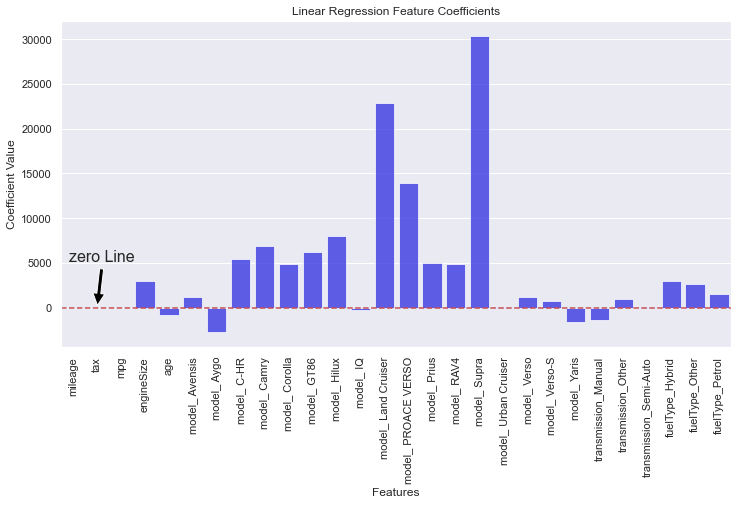

In [576]:
sns.set()
ax=plt.figure(figsize=(12,6))
ax=sns.barplot(x=features,y=fi,palette=['blue'],alpha=0.7)
ax.set(title = "Linear Regression Feature Coefficients", xlabel = "Features", ylabel = "Coefficient Value")
ax.set_xticklabels(features,rotation=90)
plt.axhline(y=0.0, color='r', linestyle='--')
ax.annotate('zero Line', (1, 0),
            xytext=(0.11, 0.3), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')


It looks like some of the features had almost 0 coefficients. For example, mileage didnt have any impact on the model. This can be verified by looking at the pairplot.
 We can visualize how our linear model is performin using a simple scatter plot of y_test and y_predict_lr points. We can also use seaborn
regplot to better visualize it.

C:\Users\ashra\anaconda3\envs\ox\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price')]

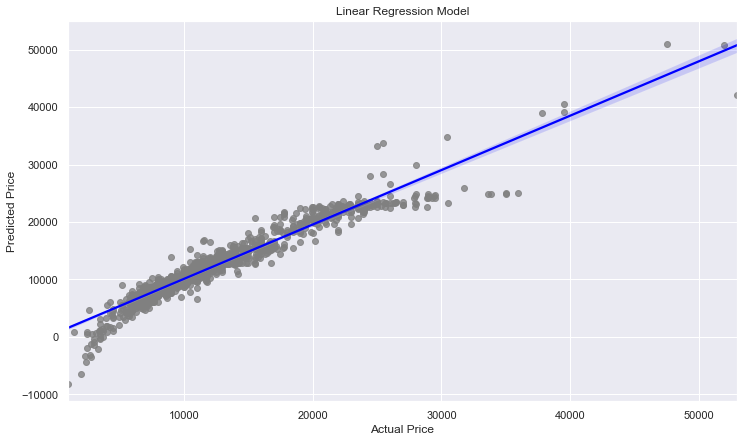

In [585]:
plt.figure(figsize=(12,7))
ax = sns.regplot(y_test, y_predict_lr, color = 'blue',scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set(title = "Linear Regression Model", xlabel = "Actual Price", ylabel = "Predicted Price")

It looks like even with keeping the outlier the multiple linear regression model was quite good at prdiction  when price is between 5000 and 25,000.

### Random Forest 
#### with Grid Search

Random Forest has a number of hyperparameters unlinke the linear regression withought regularization. We will use GridSearchCV technique to tune hyperparameters. Randomized or GridsearchCV includes Cross validation like the crossvalidation we did for linear regression.

In [586]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV # we will not use it
from sklearn.model_selection import GridSearchCV 

Let's se how RF performs without any gridsearch first just to compare it with th elinear model.

In [588]:
rf=RandomForestRegressor(max_depth=15,n_estimators=200,random_state=1)

In [589]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=1)

In [590]:
rf_score=rf.score(X_test,y_test)
rf_score

0.9654975413172608

This is really a good score, we will see if gridsearchSV can improve the performance.

In [591]:
rf=RandomForestRegressor(random_state=1)
#Look at the number of hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [592]:
# Lets define a grid of hyperparameters
rf_params={
            'n_estimators': [50,100,200,300,400],
            'max_features': ['auto','log2', 'sqrt'],
               'max_depth': [6,8,10,12,14],
               }

In [593]:
grid_rf=GridSearchCV(estimator = rf, param_grid = rf_params, scoring='neg_mean_squared_error', cv = 5, n_jobs = -1)

In [594]:
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 14],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='neg_mean_squared_error')

In [595]:
best_hyperparams = grid_rf.best_params_

In [596]:
best_hyperparams

{'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 300}

In [597]:
best_rf=grid_rf.best_estimator_

In [233]:
best_rf

RandomForestRegressor(max_depth=14, max_features='sqrt', n_estimators=300,
                      random_state=1)

In [598]:
y_pred_rf=best_rf.predict(X_test)

In [599]:
rf_score=best_rf.score(X_test, y_test)
rf_score

0.96945201151962

Looks like we were able to marginally improve the model. We will take it. We will sxplore important features and plot regplot like we did for lienar regression. We probably should writer a function fo do all these repititive tasks, but we will do that later


In [600]:
fi_rf=best_rf.feature_importances_

Text(0.74, 0.3, 'zero Line')

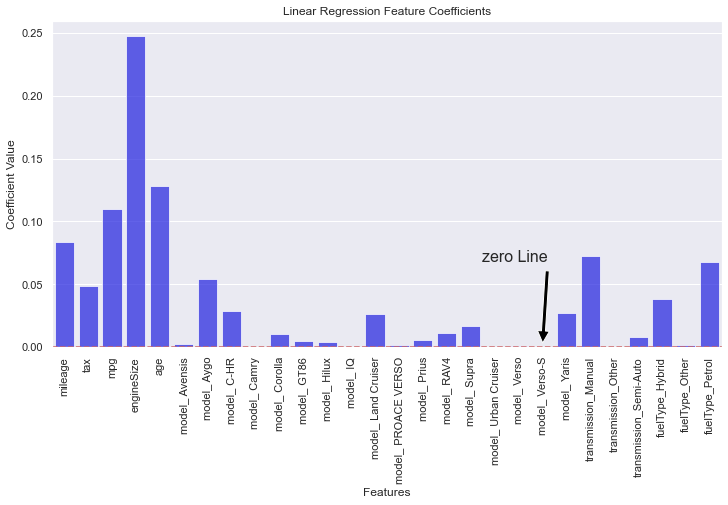

In [601]:
sns.set()
ax=plt.figure(figsize=(12,6))
ax=sns.barplot(x=features,y=fi_rf,palette=['blue'],alpha=0.7)
ax.set(title = "Linear Regression Feature Coefficients", xlabel = "Features", ylabel = "Coefficient Value")
ax.set_xticklabels(features,rotation=90)
plt.axhline(y=0.0, color='r', linestyle='--')
ax.annotate('zero Line', (20, 0),
            xytext=(.74, 0.3), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')


C:\Users\ashra\anaconda3\envs\ox\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price ')]

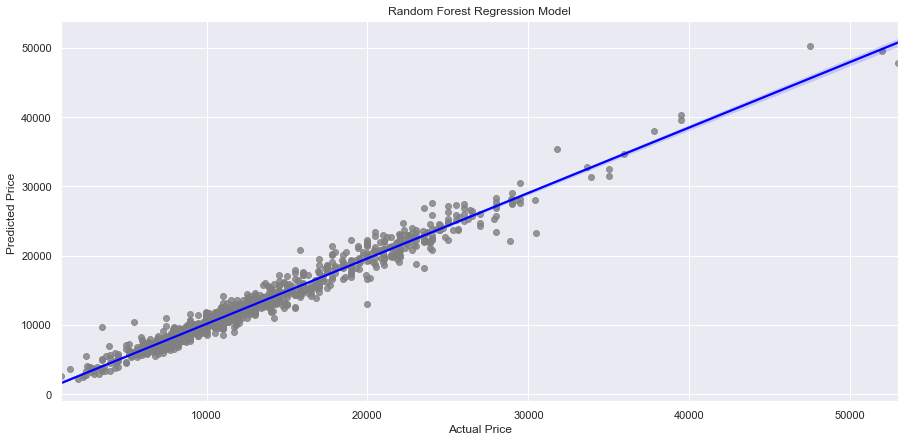

In [613]:
# We can visualize how our linear model is performin using a simple scatter plot of y_test and y_predict_lr points. We can also use seaborn
# regplot to better visualize it.
plt.figure(figsize=(15,7))
ax = sns.regplot(y_test, y_pred_rf, color = 'red', scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set(title = "Random Forest Regression Model", xlabel = "Actual Price", ylabel = "Predicted Price ")


The plot looks much better than what we saw for linear regression. Undoubteley there are less error in the RF model

## XGBoost


XGBoost has many tuning parameters. We will first use some preset and default parameters to see how the model is doing .


In [604]:
import xgboost as xgb

In [605]:
xgr=xgb.XGBRegressor(random_state=1)


In [606]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [607]:
y_pred_xgr=xgr.predict(X_test)


In [609]:
xgr_score=xgr.score(X_test,y_test)

In [610]:
xgr_score

0.9700701185302594

Thats a really good score. We will not do any hyperparameter turing as I dont think we need a better score than this one.

In [611]:
fi_xgr=xgr.feature_importances_


Text(0.74, 0.3, 'zero Line')

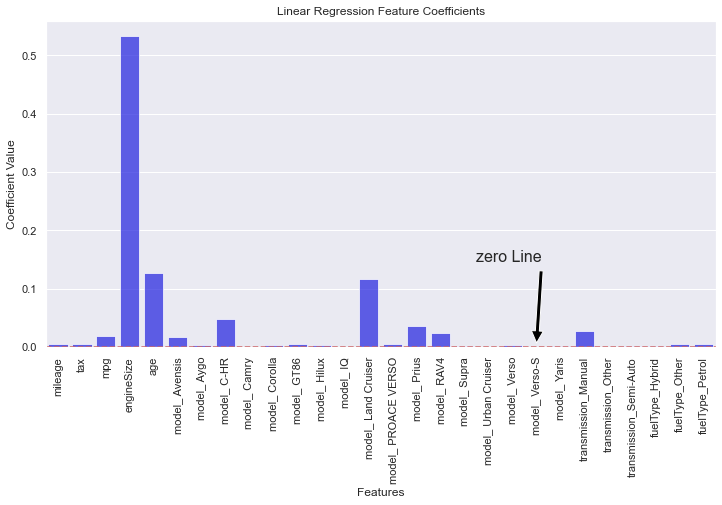

In [612]:
sns.set()
ax=plt.figure(figsize=(12,6))
ax=sns.barplot(x=features,y=fi_xgr,palette=['blue'],alpha=0.7)
ax.set(title = "Linear Regression Feature Coefficients", xlabel = "Features", ylabel = "Coefficient Value")
ax.set_xticklabels(features,rotation=90)
plt.axhline(y=0.0, color='r', linestyle='--')
ax.annotate('zero Line', (20, 0),
            xytext=(.74, 0.3), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')


C:\Users\ashra\anaconda3\envs\ox\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'XGBoost Regression Model'),
 Text(0.5, 0, 'Actual Price(£)'),
 Text(0, 0.5, 'Predicted Price (£)')]

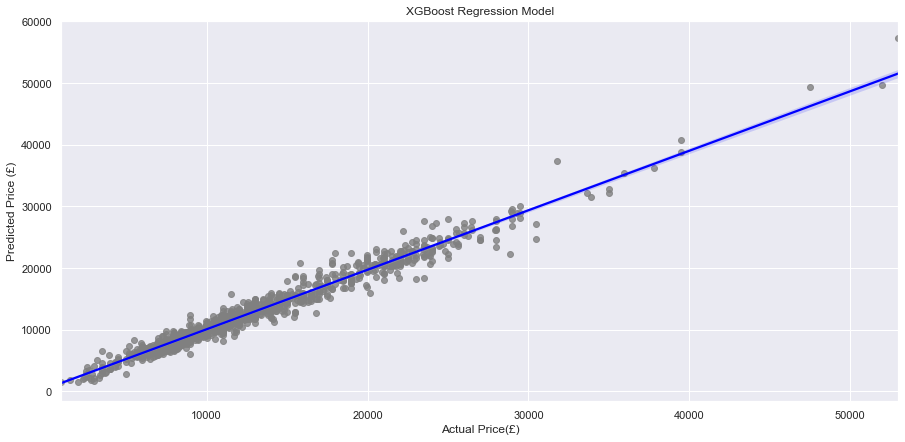

In [614]:

plt.figure(figsize=(15,7))
ax = sns.regplot(y_test, y_pred_xgr,  scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set(title = "XGBoost Regression Model", xlabel = "Actual Price(£)", ylabel = "Predicted Price (£)")


In [616]:
MSE_lr= mean_squared_error(y_test, y_pred_lr)
MSE_rf= mean_squared_error(y_test, y_pred_rf)
MSE_xgr= mean_squared_error(y_test, y_pred_xgr)


In [617]:
MSE_lr

2652824.5004345938

In [618]:
MSE_rf

1162776.0198156585

In [619]:
MSE_xgr

1139248.447448235

We see XGBoost performed the best in terms of both R^2 and MSE  